<a href="https://colab.research.google.com/github/otavioaugusto1/unsupervised-algorithms/blob/main/Algoritmos_n%C3%A3o_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'
filmes = pd.read_csv(url)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
traducao = {
    "movieId" : "id",
    "title": "titulo",
    "genres": "genero"
}
filmes=filmes.rename(columns=traducao)
filmes.head()

,id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
generos=filmes.genero.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
filmes =pd.concat([filmes,generos],axis = 1)

In [ ]:
filmes.head()

,id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
 

In [ ]:
scaler=StandardScaler()
generos_escalados=scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [ ]:
from sklearn.cluster import KMeans
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(" O modelo {}".format(modelo.labels_))

 O modelo [2 2 0 ... 0 2 0]


In [ ]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 0.03633547 -0.26758889 -0.2429199  -0.24227966 -0.2408689   0.20996098
  -0.27276413  0.13034364  0.12260512 -0.17509185 -0.08964258 -0.10802726
  -0.10872328  0.01917364 -0.21829995  0.19074996 -0.16369058 -0.48665405
   0.08391975  0.05045334]
 [-0.05917995  0.42659014 -0.14749301 -0.23458962 -0.26217426 -0.56155714
   0.86731853 -0.21347157  0.06291107 -0.16099515  0.27757208  0.40864452
  -0.03922233 -0.17924792  0.62948858 -0.31864418  0.13019843  1.45684699
  -0.11604505 -0.07099841]
 [-0.05917995  0.45273487  1.39022555  1.54676194  1.59076882  0.06014361
  -0.33044939 -0.21013204 -0.68055182  1.10218472 -0.09492563 -0.25016683
   0.57316244  0.23982059 -0.14608526 -0.29608604  0.51638707 -0.42369626
 

In [ ]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.036335,-0.267589,-0.242920,-0.242280,-0.240869,0.209961,-0.272764,0.130344,0.122605,-0.175092,-0.089643,-0.108027,-0.108723,0.019174,-0.218300,0.190750,-0.163691,-0.486654,0.083920,0.050453
1,-0.059180,0.426590,-0.147493,-0.234590,-0.262174,-0.561557,0.867319,-0.213472,0.062911,-0.160995,0.277572,0.408645,-0.039222,-0.179248,0.629489,-0.318644,0.130198,1.456847,-0.116045,-0.070998
2,-0.059180,0.452735,1.390226,1.546762,1.590769,0.060144,-0.330449,-0.210132,-0.680552,1.102185,-0.094926,-0.250167,0.573162,0.239821,-0.146085,-0.296086,0.516387,-0.423696,-0.174469,-0.102638


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f5277438>,
      dtype=object)

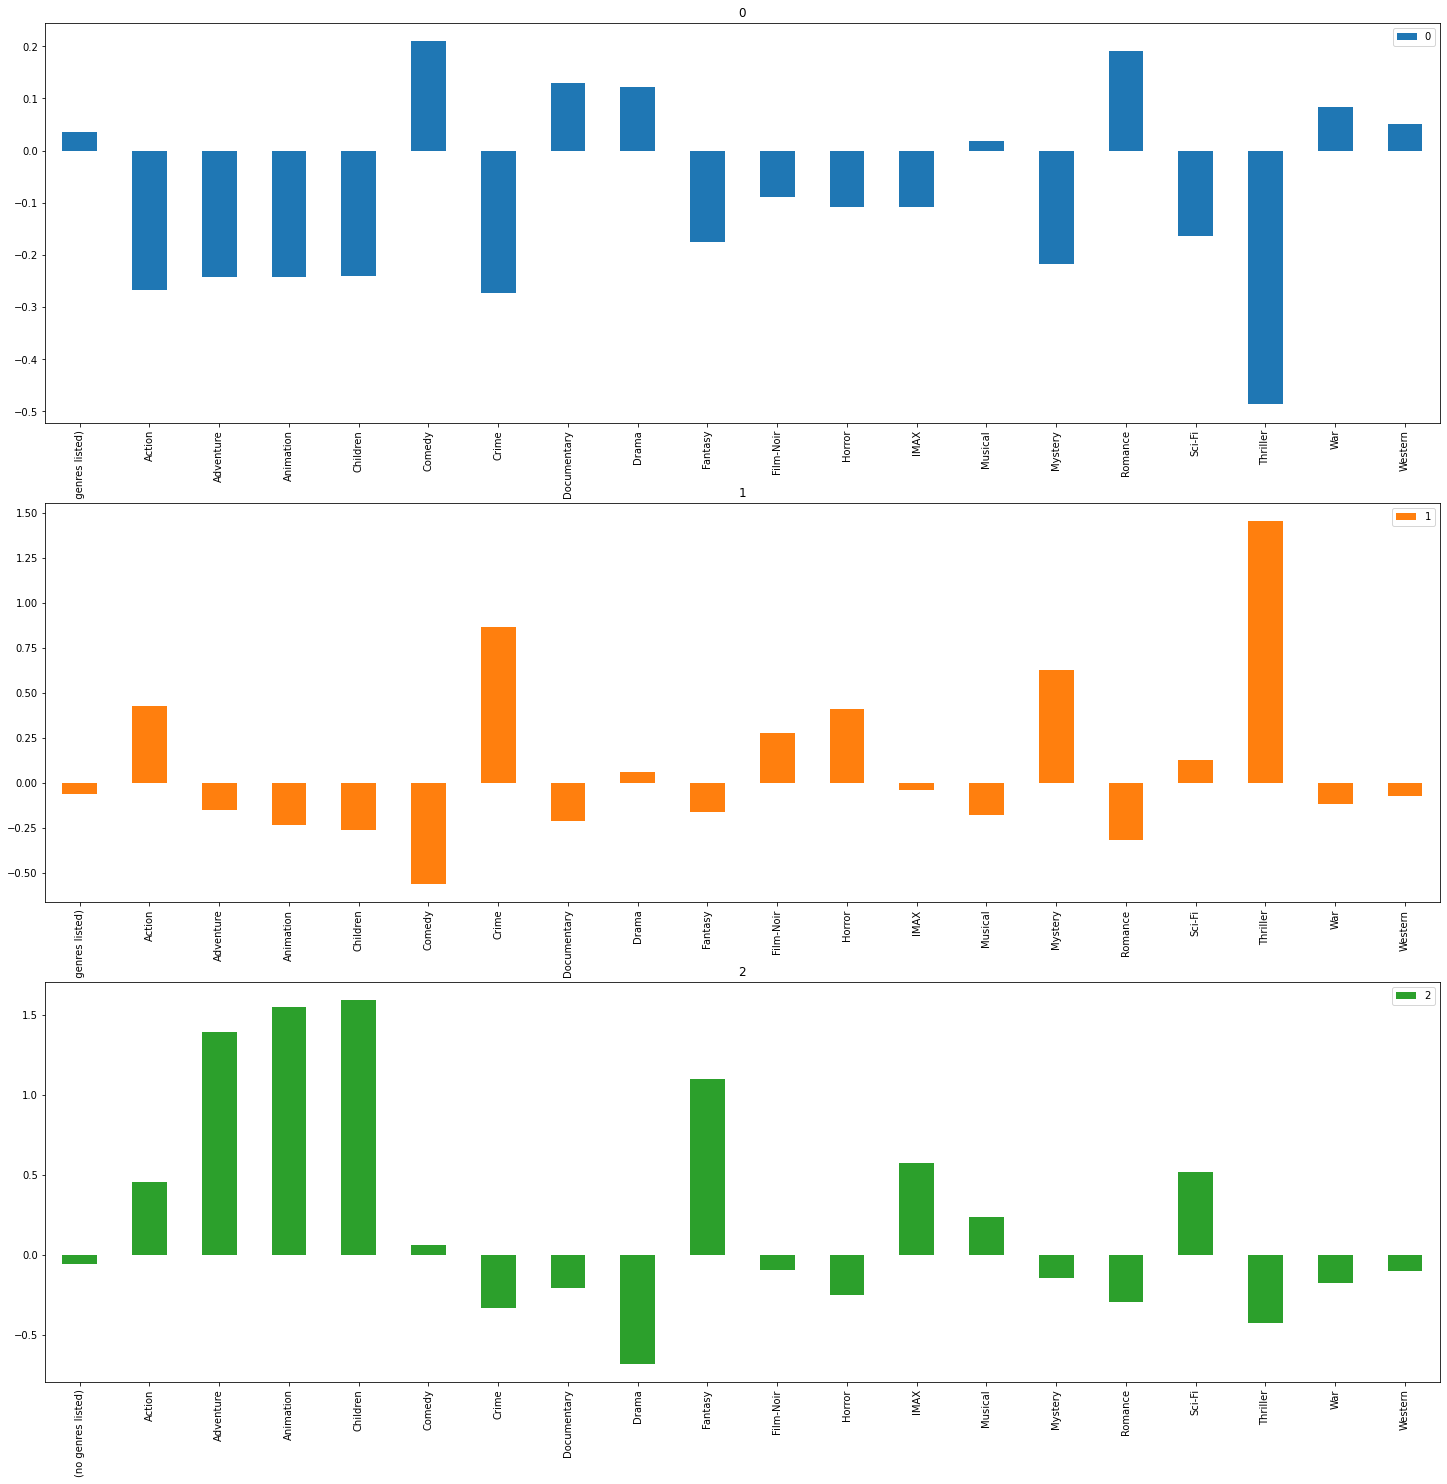

In [ ]:
grupos.transpose().plot.bar(subplots=True,figsize = (25,25),sharex = False)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()

In [ ]:
 visualizacao=tsne.fit_transform(generos_escalados)
 visualizacao

array([[ 56.778843 , -37.124847 ],
       [ 45.286644 , -47.96081  ],
       [-35.45312  ,  17.270365 ],
       ...,
       [ -1.7380788, -15.647429 ],
       [ 53.246693 , -15.828852 ],
       [ 13.549833 ,  20.804523 ]], dtype=float32)

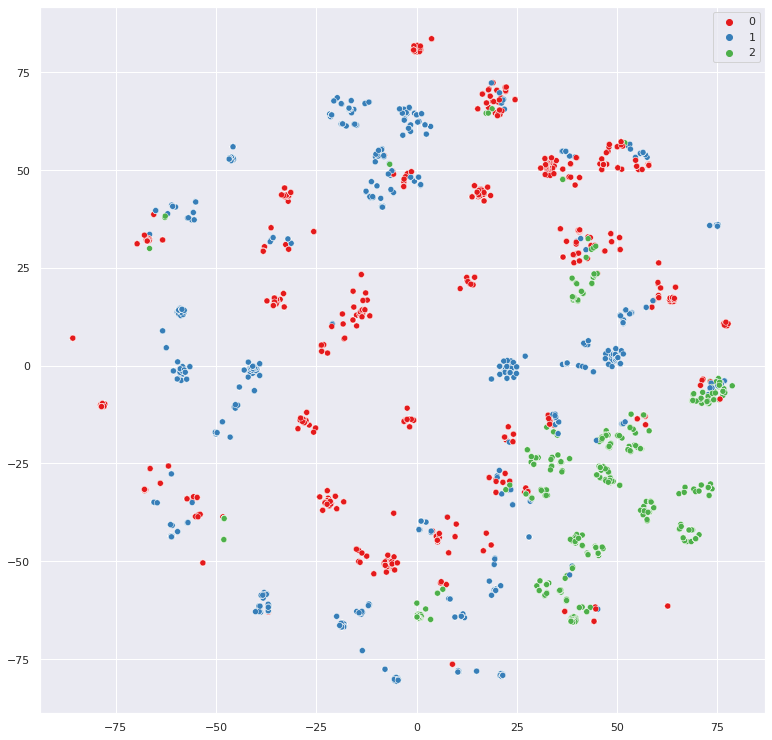

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visualizacao[:,0],y=visualizacao[:,1],hue = modelo.labels_,palette = sns.color_palette('Set1',3))

# TSNE reduziu de 20 para somente 2 dimensões e, com isso, houve perda de informação. Há cores muito próximas, mas isso não quer dizer que o algoritmo esteja errado, somente não seria ideal mostrar em duas dimensões.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f2377c50>,
      dtype=object)

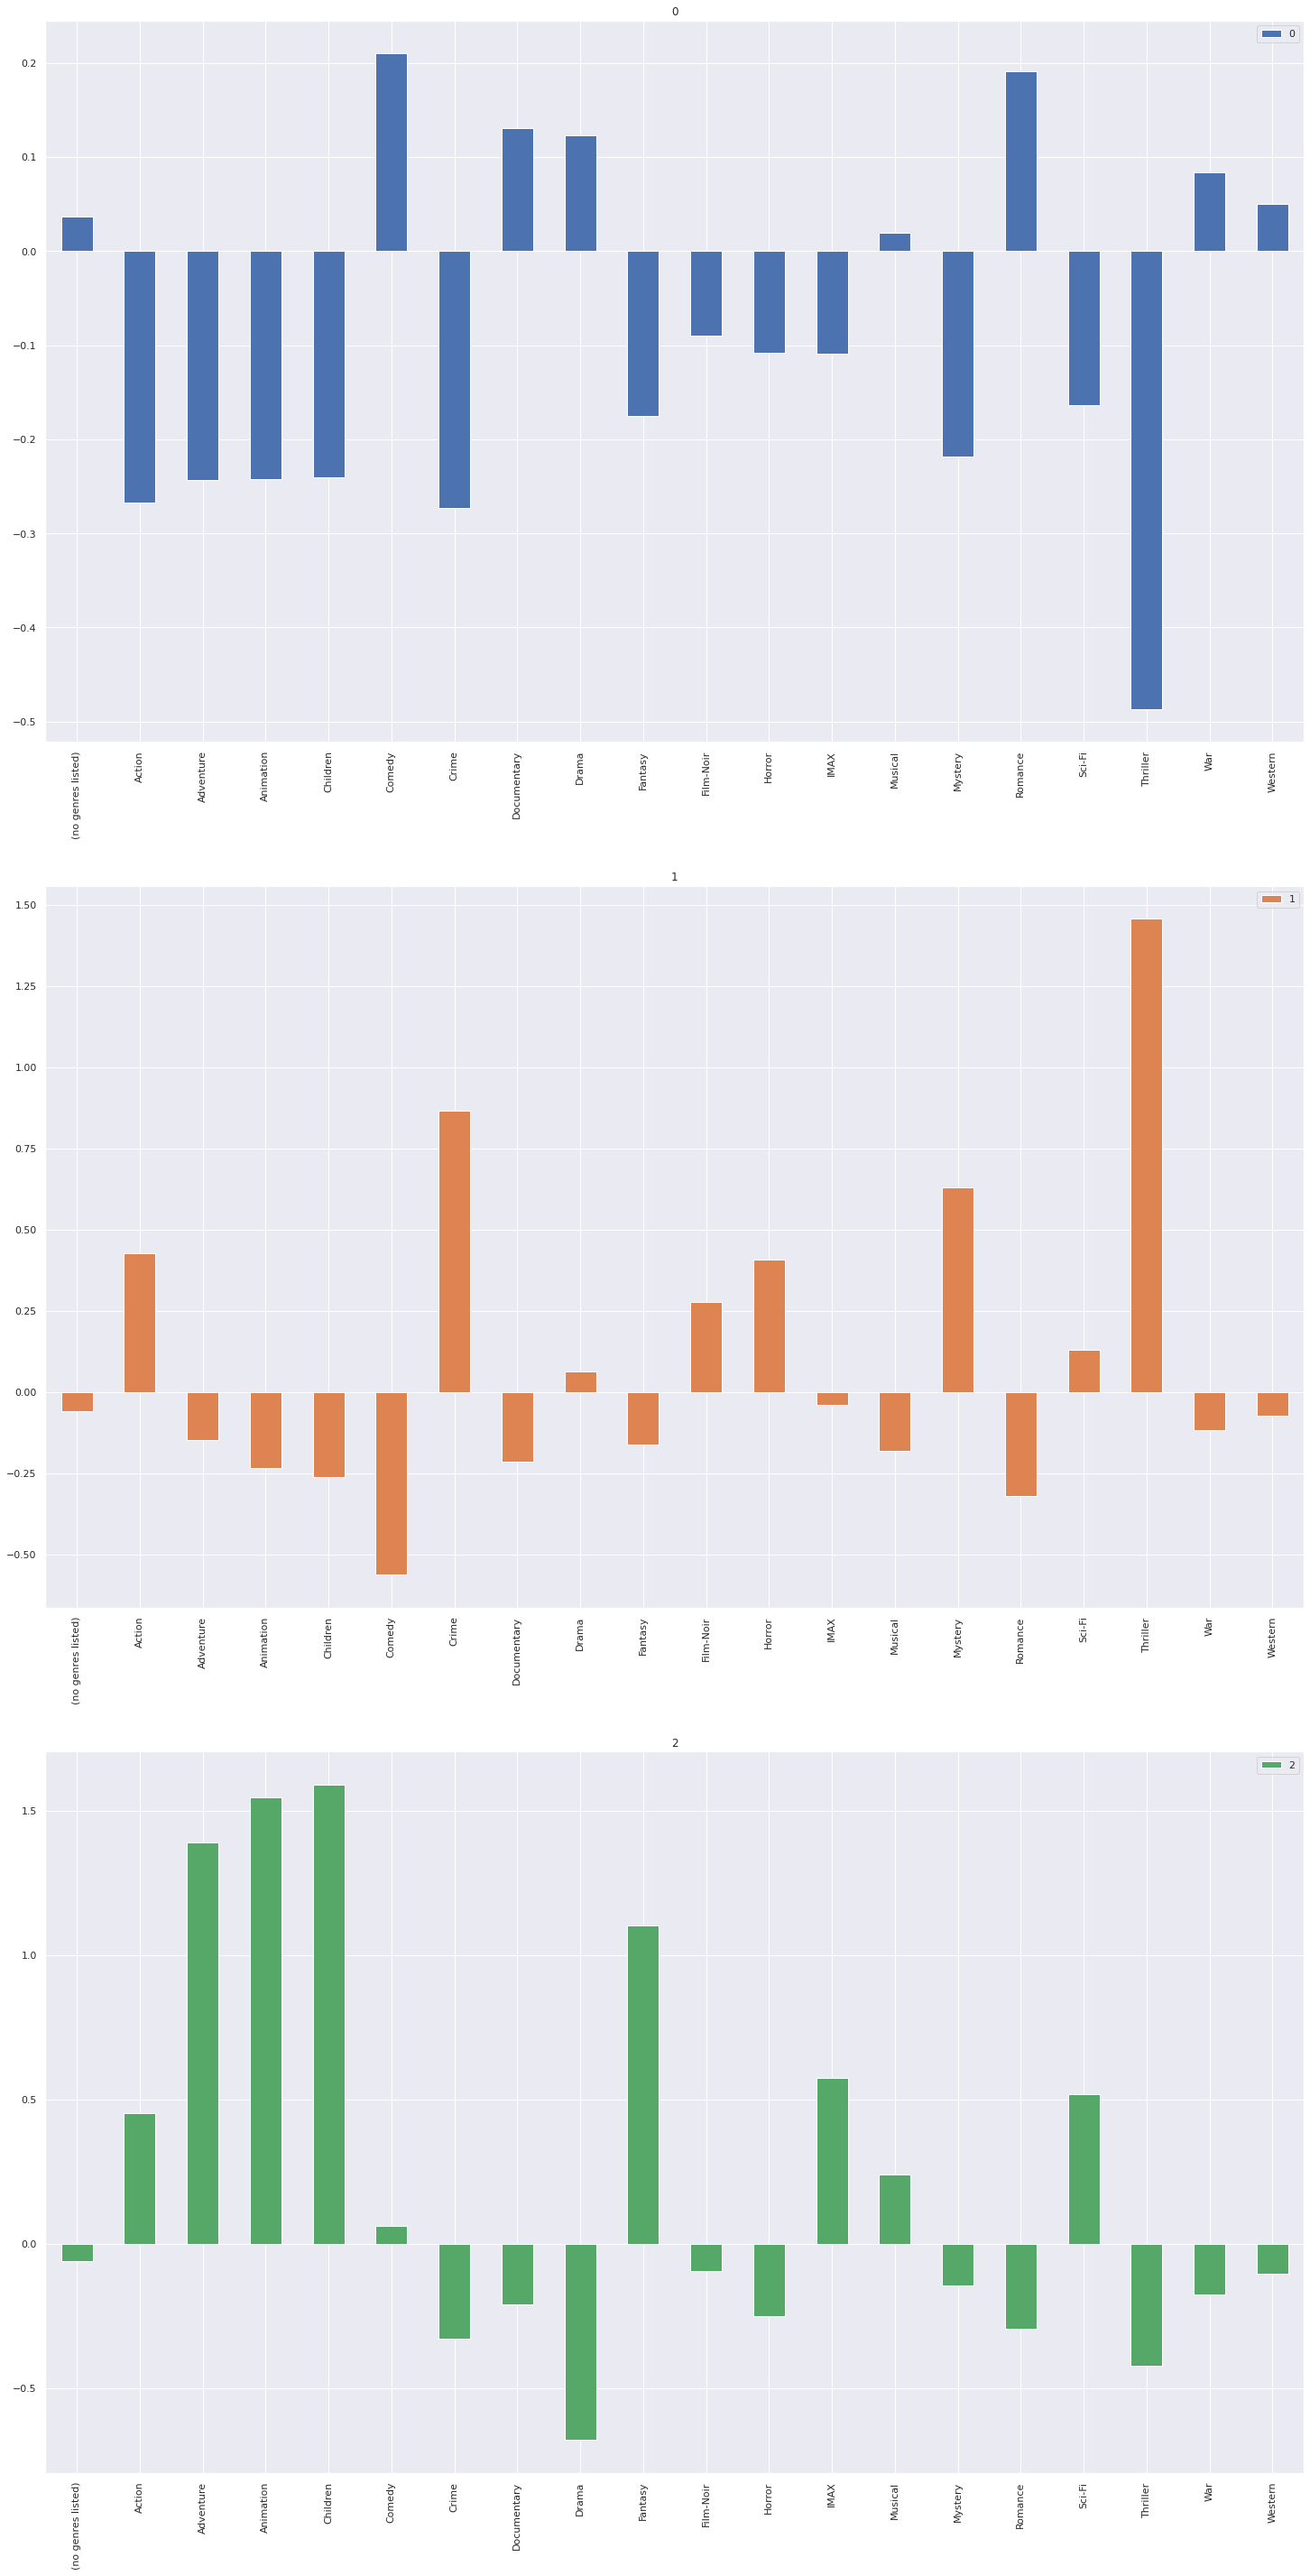

In [ ]:
modelos = KMeans(n_clusters=20)
modelos.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,figsize = (25,50),sharex = False)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
modelo = AgglomerativeClustering(n_clusters= 17)
modelo.fit_predict(generos_escalados)

array([ 5, 14, 13, ...,  2,  5,  3])